In [1]:
# General-purpose libraries
import numpy as np
import warnings

# Data processing and transformation
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter

# Model and decomposition
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

# Handle warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Shear_Wall_Database dataset
shear_wall_data = pd.read_excel("data/Shear_Wall_Database.xlsx")

# Display the first few rows of the dataset
shear_wall_data.head(), shear_wall_data.shape

(   Unnamed: 0                Author Specimen  FailureMode  M/Vlw      lw/tw  \
 0           1  Lefas et al. (1990a)     SW11            1    1.1  10.714286   
 1           2  Lefas et al. (1990a)     SW12            1    1.1  10.714286   
 2           3  Lefas et al. (1990a)     SW13            1    1.1  10.714286   
 3           4  Lefas et al. (1990a)     SW14            1    1.1  10.714286   
 4           5  Lefas et al. (1990a)     SW15            1    1.1  10.714286   
 
    ρvwFy,vw/fc  ρhwFy,vw/fc  ρvcFy,vc/fc  ρhcFy,hc/fc    P/fcAg Section  Ab/Ag  
 0     0.268879     0.136711     0.348231     0.149140  0.000000       R    0.0  
 1     0.262358     0.133396     0.339785     0.145522  0.102168       R    0.0  
 2     0.346364     0.176108     0.448584     0.192118  0.208187       R    0.0  
 3     0.334023     0.169834     0.432601     0.185273  0.000000       R    0.0  
 4     0.324766     0.165127     0.420612     0.180139  0.101727       R    0.0  ,
 (393, 13))

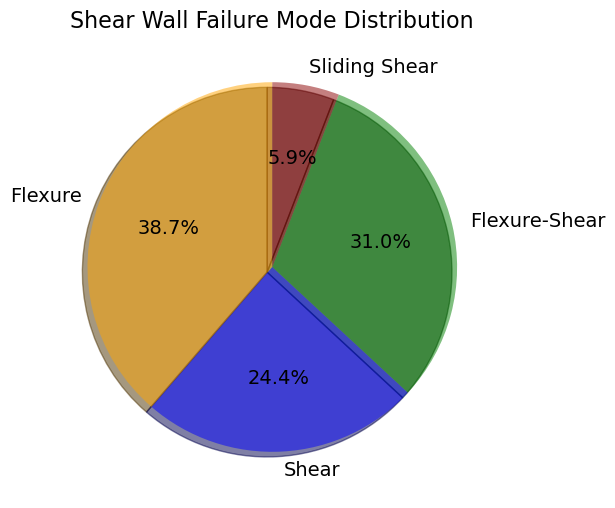

In [3]:
# Drop unnecessary columns and categorical columns
features = shear_wall_data.drop(columns=["Unnamed: 0", "Author", "Specimen", "Section", "FailureMode"])
X = features.values
y = shear_wall_data["FailureMode"].values

# Standardize the feature matrix
X = StandardScaler().fit_transform(X)

# Count occurrences of each unique value in the 'FailureMode' column
unique_elements, counts_elements = np.unique(shear_wall_data['FailureMode'], return_counts=True)

# Map the numeric classes to their respective names
class_names = {
    1: 'Flexure',
    2: 'Shear',
    3: 'Flexure-Shear',
    4: 'Sliding Shear'
}
labels = [class_names[element] for element in unique_elements]

# Define a colormap with four distinct colors
cm_bright = ListedColormap(['#FFA500', '#0000FF', '#008000', '#8B0000'])

# Create a pie chart to visualize the distribution of failure modes
fig, ax = plt.subplots(figsize=(11, 6))
ax.pie(counts_elements, labels=labels, autopct='%1.1f%%', colors=cm_bright.colors, 
       wedgeprops={'alpha':0.5}, shadow=True, startangle=90, textprops={'fontsize': 14})
ax.set_title("Shear Wall Failure Mode Distribution", fontsize=16)
plt.show()

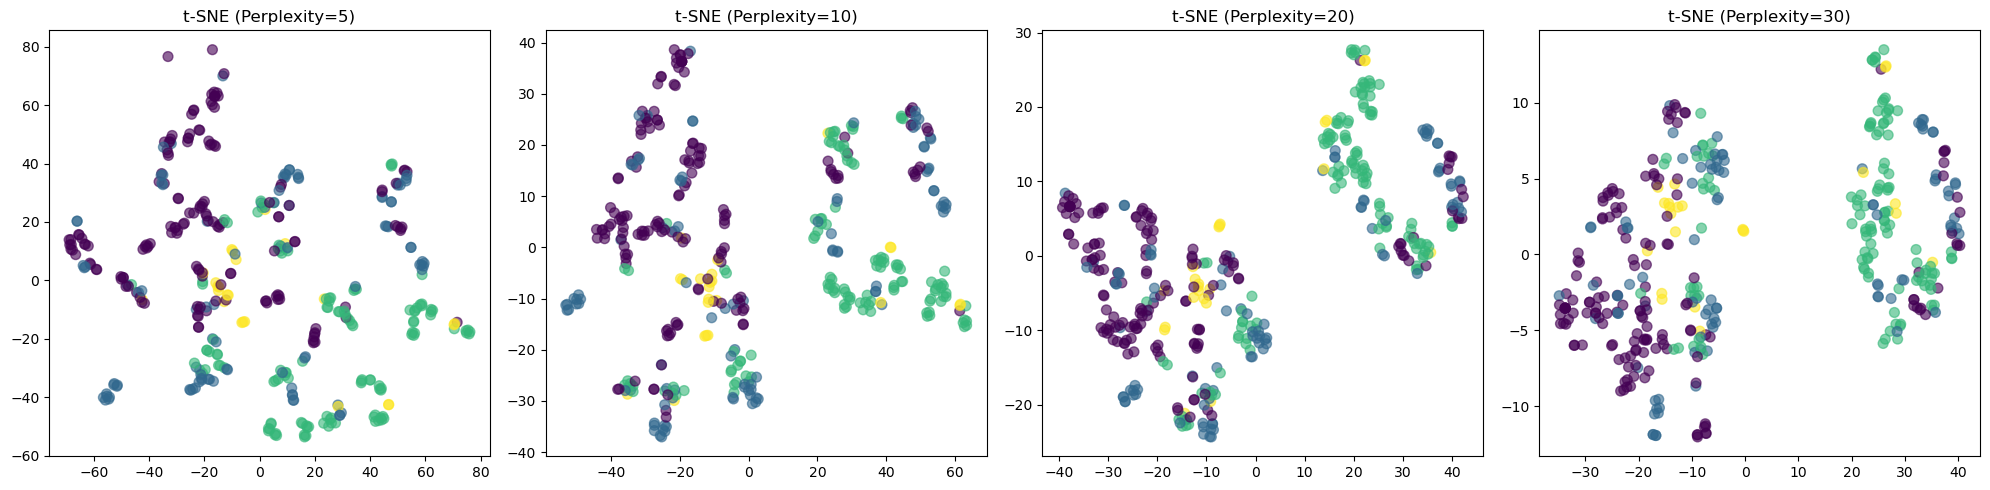

In [4]:
# Preprocessing: Normalize the data using Min-Max scaling
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)  # X_normalized

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of perplexities
tsne_perplexities_1 = [5, 10, 20, 30]

# Compute the t-SNE transformations for these perplexities
tsne_transformations_1 = [TSNE(n_components=2, perplexity=p).fit_transform(X) for p in tsne_perplexities_1]

# Plotting
for ax, data, perplexity in zip(axes, tsne_transformations_1, tsne_perplexities_1):
    sc = ax.scatter(data[:, 0], data[:, 1], c=y, cmap='viridis', s=50, alpha=0.6)
    ax.set_title(f't-SNE (Perplexity={perplexity})')

plt.tight_layout()
plt.show()


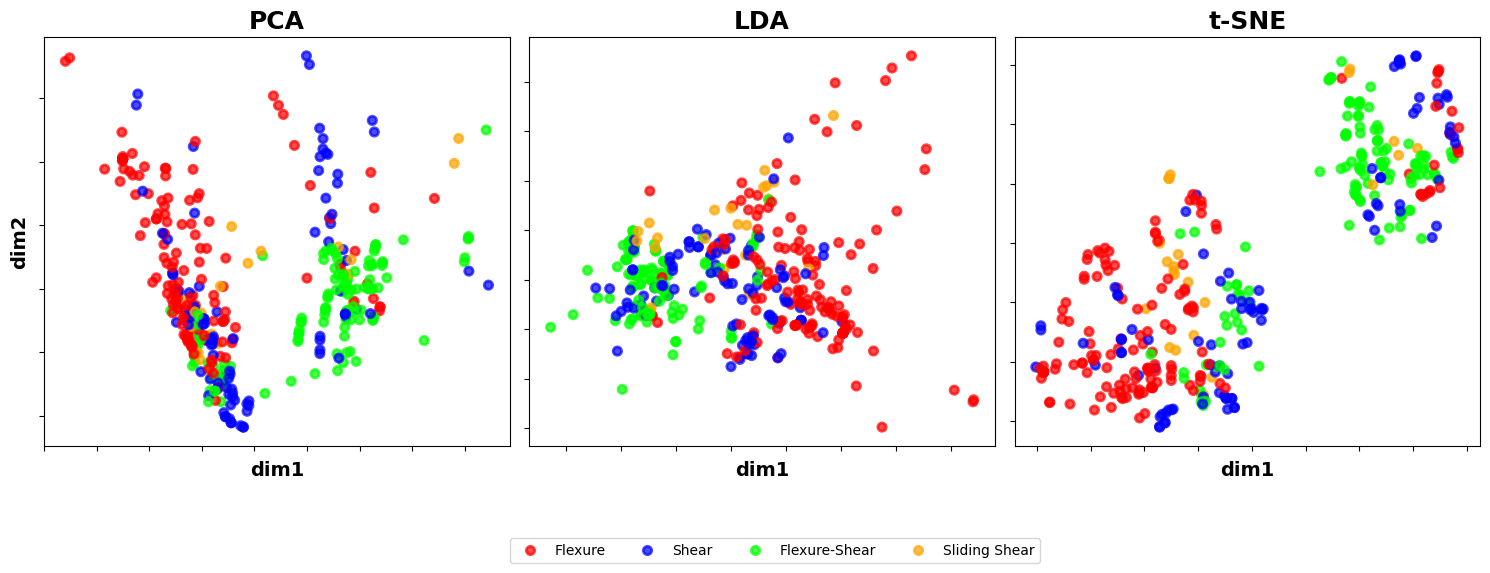

In [5]:
# Define labels and colormap for plotting
labels = ['Flexure', 'Shear', 'Flexure-Shear', 'Sliding Shear']
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FFA500'])

# Apply dimensionality reduction techniques: PCA, LDA, and t-SNE
X_r = PCA(n_components=2).fit_transform(X)
X_r2 = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
X_r3 = TSNE(n_components=2, perplexity=100).fit_transform(X)

# Create subplots to visualize the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot PCA results
scatter0 = axes[0].scatter(X_r[:, 0], X_r[:, 1], c=y, alpha=.7, lw=2, cmap=cm_bright)
axes[0].set_xlabel("dim1", fontweight='bold', fontsize=14)
axes[0].set_ylabel("dim2", fontweight='bold', fontsize=14)
axes[0].xaxis.set_major_formatter(NullFormatter())
axes[0].yaxis.set_major_formatter(NullFormatter())
axes[0].set_title("PCA", fontweight='bold', fontsize=18)

# Plot LDA results
scatter1 = axes[1].scatter(X_r2[:, 0], X_r2[:, 1], c=y, alpha=.7, lw=2, cmap=cm_bright)
axes[1].set_xlabel("dim1", fontweight='bold', fontsize=14)
axes[1].xaxis.set_major_formatter(NullFormatter())
axes[1].yaxis.set_major_formatter(NullFormatter())
axes[1].set_title("LDA", fontweight='bold', fontsize=18)

# Plot t-SNE results
scatter2 = axes[2].scatter(X_r3[:, 0], X_r3[:, 1], c=y, alpha=.7, lw=2, cmap=cm_bright)
axes[2].set_xlabel("dim1", fontweight='bold', fontsize=14)
axes[2].xaxis.set_major_formatter(NullFormatter())
axes[2].yaxis.set_major_formatter(NullFormatter())
axes[2].set_title("t-SNE", fontweight='bold', fontsize=18)

# Add a common legend for all subplots
fig.legend(ncol=4, loc='lower center', bbox_to_anchor=(0.52, -0.15), shadow=False, scatterpoints=1,
           handles=scatter2.legend_elements()[0], labels=labels, fontsize=10)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()